<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

1. Загрузить датасет

In [44]:
import io
import requests
import ssl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

In [3]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. Посмотреть отсутствующие значения (какое количество Nan элементов).

In [56]:
# количество отсутствующих значений по переменным
# dataset.info()
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. 
    Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2

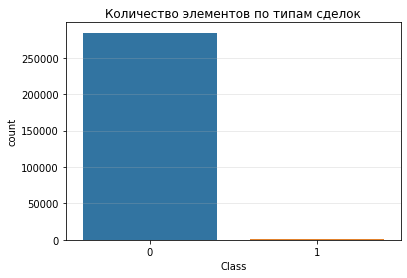

In [17]:
ax = sns.countplot(x='Class', data=dataset)
plt.title('Количество элементов по типам сделок')
ax.grid(axis = 'y', alpha=0.3)
# ax.legend()

In [3]:
# dataset['Class'].unique()
dataset['Class'].value_counts() # кол-во элементов по каждому типу сделок

0    284315
1       492
Name: Class, dtype: int64

In [3]:
dataset['Class'].value_counts(normalize=True)*100 # доли элементов по каждому типу сделок (в процентном выражении)

0    99.827251
1     0.172749
Name: Class, dtype: float64

Text(0.5, 1.0, 'Средняя сумма сделки')

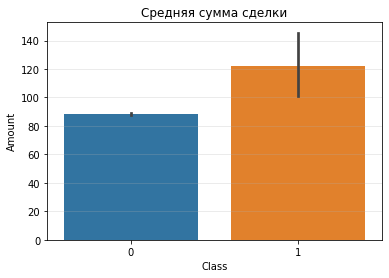

In [15]:
# plt.figure(figsize=(10,8))
ax = sns.barplot(x='Class', y='Amount', data=dataset)
ax.grid(axis = 'y', alpha=0.3)
plt.title('Средняя сумма сделки')
# sns.barplot(x='Class', y='Amount', data=dataset, estimator=sum)

In [ ]:
# средняя сумма обманной сделки (122.21) превышает аналогичный показатель честной сделки (88.29) 

In [55]:
print('Средняя сумма честной сделки: ', "%.2f" % dataset[dataset['Class'] == 0]['Amount'].mean())
print('Средняя сумма обманной сделки: ', "%.2f" % dataset[dataset['Class'] == 1]['Amount'].mean())

Средняя сумма честной сделки:  88.29
Средняя сумма обманной сделки:  122.21


4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях? Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [7]:
print('Сумма честных сделок: ', "%.2f" % dataset[dataset['Class'] == 0]['Amount'].sum())
print('Сумма обманных сделок: ', "%.2f" % dataset[dataset['Class'] == 1]['Amount'].sum())

Сумма честных сделок:  25102462.04
Сумма обманных сделок:  60127.97


In [14]:
deceptive = dataset[dataset['Class'] == 1]
honest = dataset[dataset['Class'] == 0]

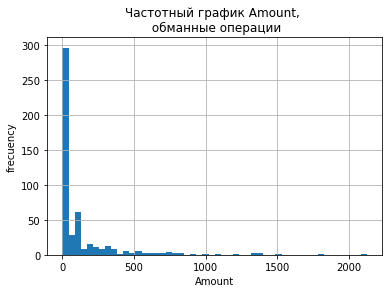

In [20]:
# Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: 
# обманные операции
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(deceptive['Amount'], 50)

plt.xlabel('Amount')
plt.ylabel('frecuency')
plt.title('Частотный график Amount, \n обманные операции')
plt.grid(True)
plt.show()

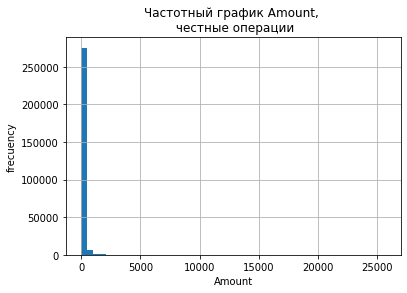

In [21]:
# честные операции
n, bins, patches = plt.hist(honest['Amount'], 50)

plt.xlabel('Amount')
plt.ylabel('frecuency')
plt.title('Частотный график Amount, \n честные операции')
plt.grid(True)
plt.show()

5. Построить графики histograms для всех значений

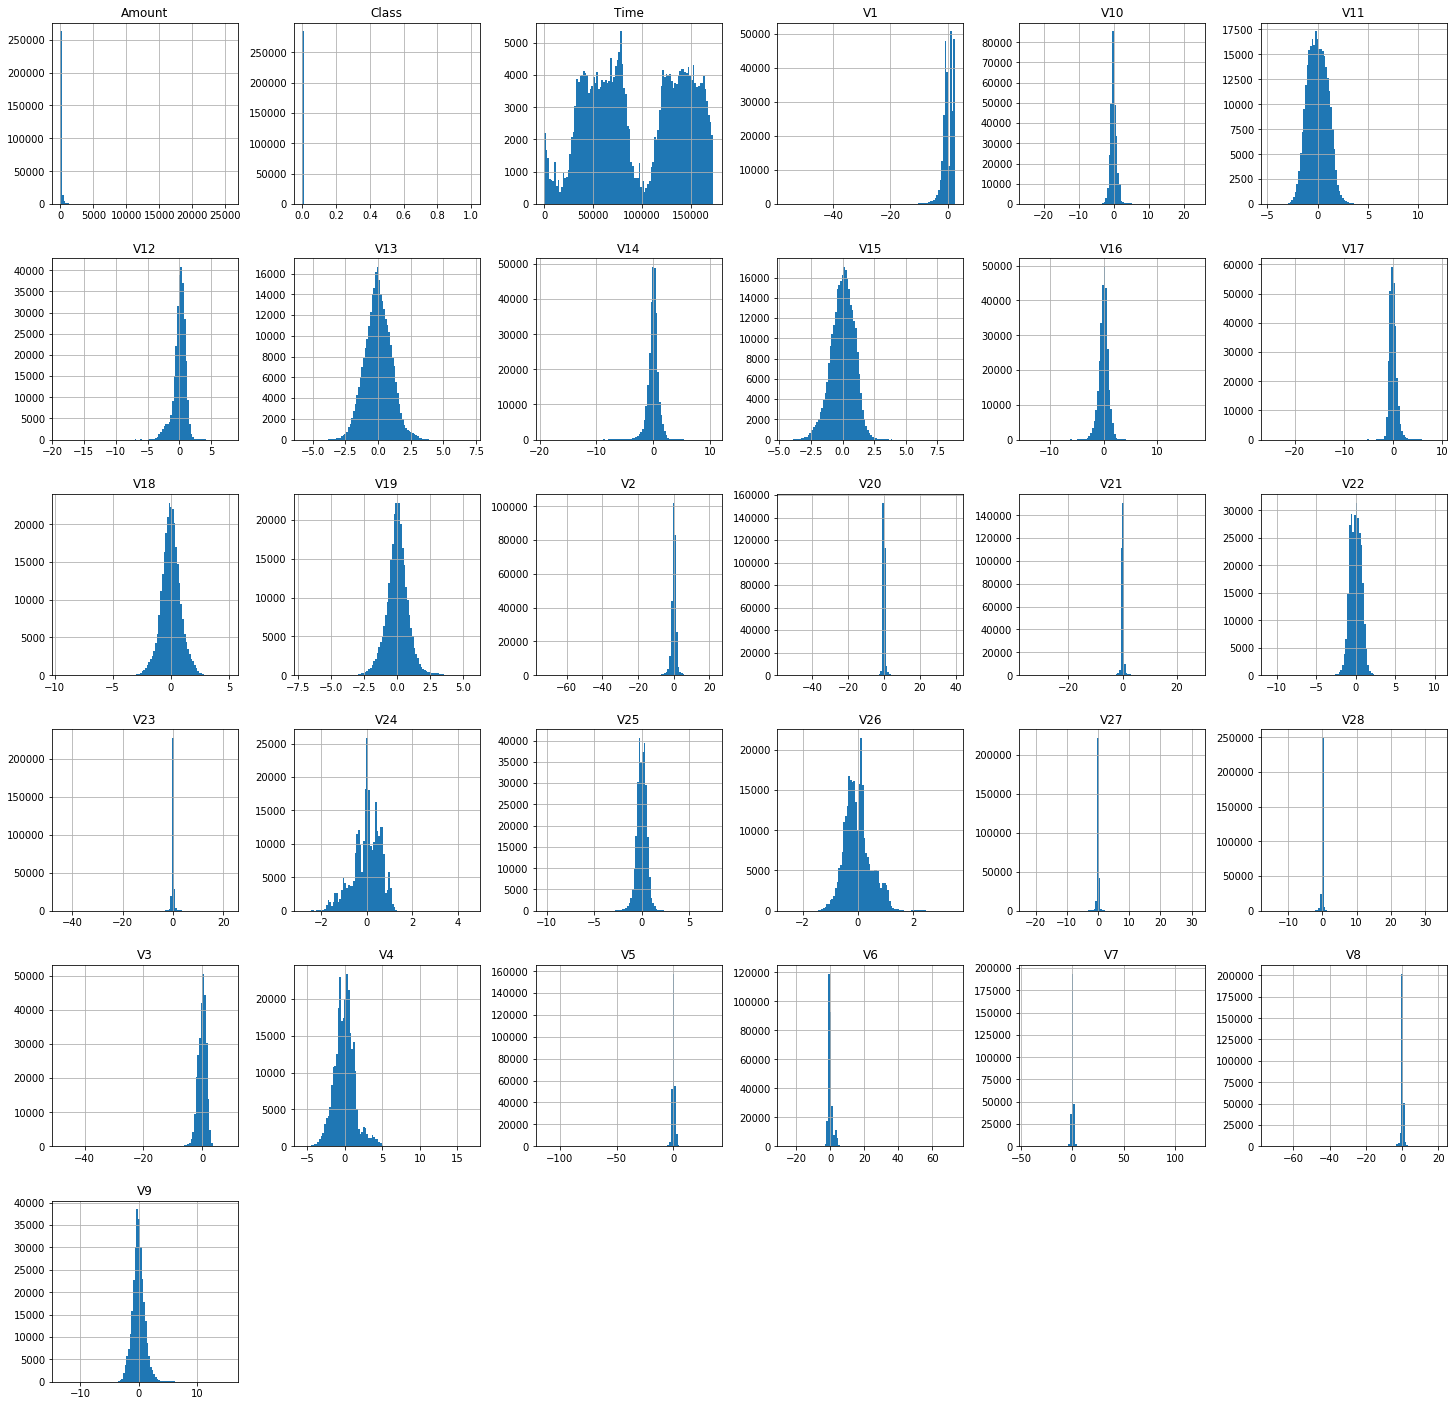

In [5]:
dataset.hist(figsize=(25,25), bins = 100)
plt.show()

In [10]:
# n, bins, patches = plt.hist(dataset['V4'], 100, facecolor='r')

# plt.xlabel('V4')
# plt.ylabel('frecuency')
# plt.title('Частотный график V4 (разбиение интервала по 100 элементов)')
# plt.grid(True)
# plt.show()

6. Построить матрицу корреляций для всех значений

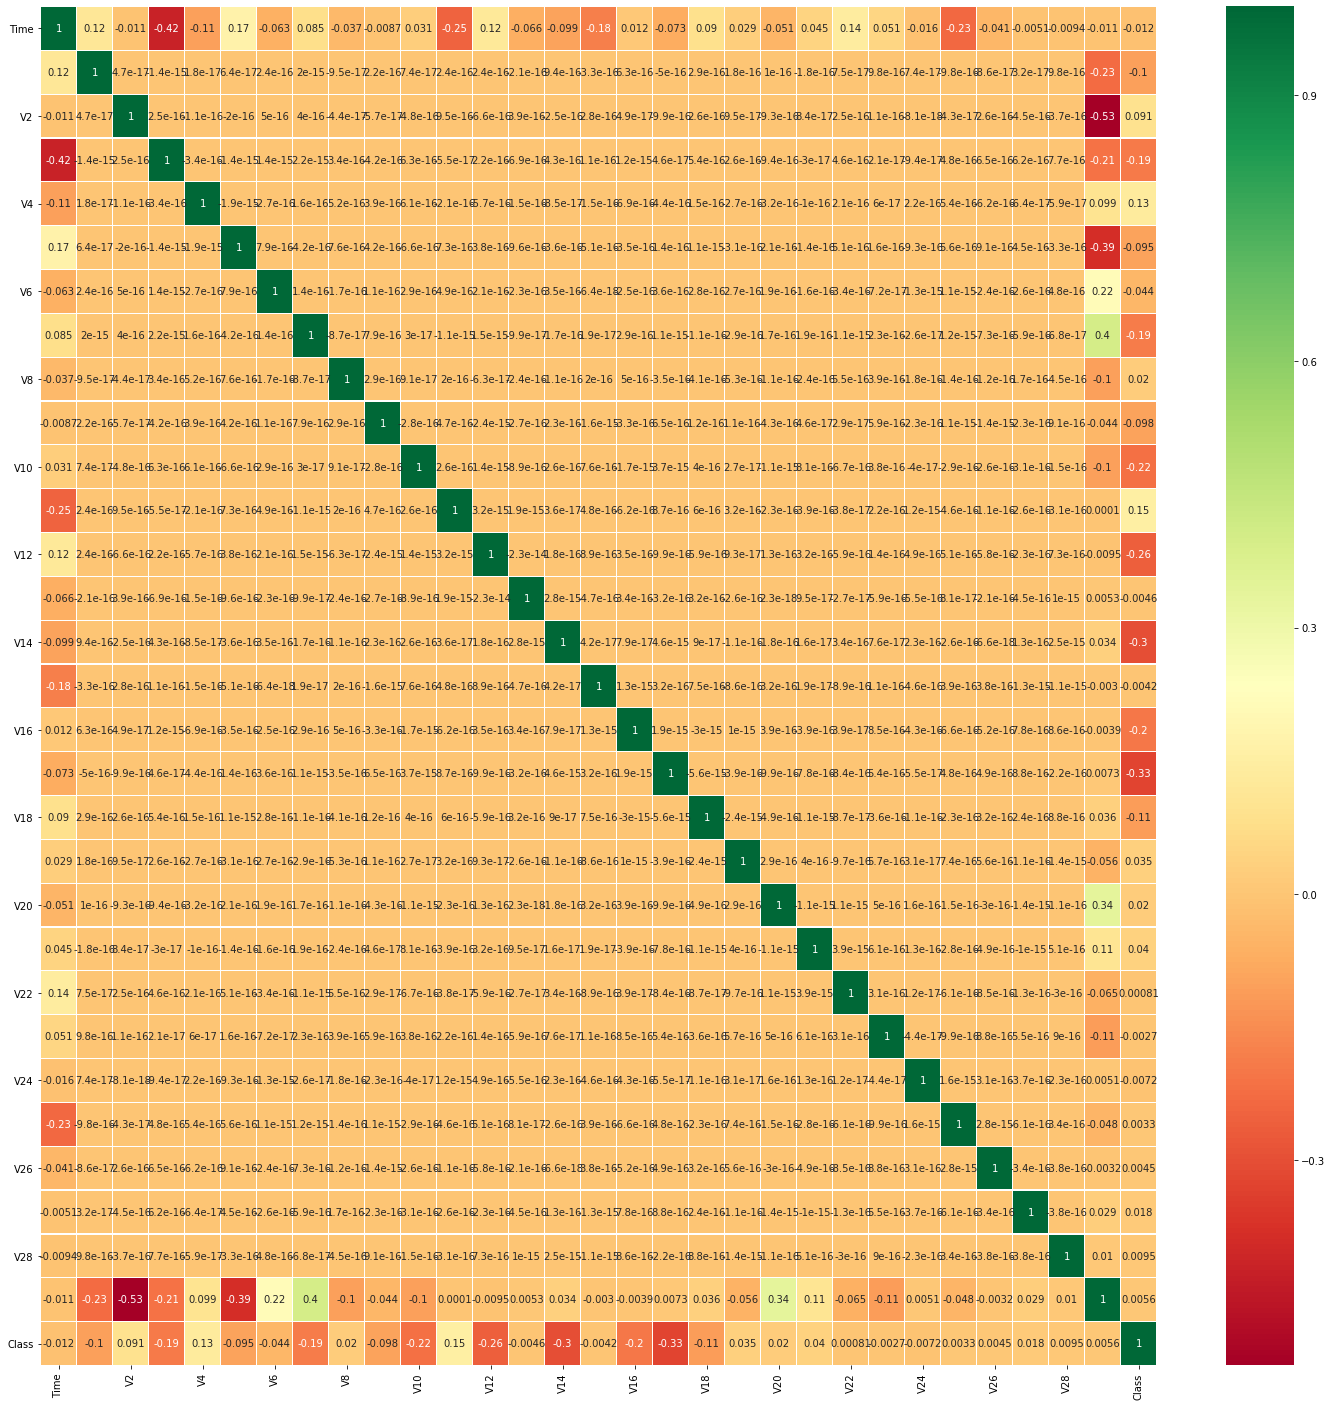

In [57]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(25,25)
plt.show()


In [ ]:
# большинство атрибутов не коррелируют друг с другом
# среди тех атрибутов, для которых такая связь существует, максимальное значение коэффициента корреляии: -0,53 (V2 и Amount)

7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.

In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 30].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [23]:
# обучаем модель с помощью класса sklearn класса RandomForestClassifie
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

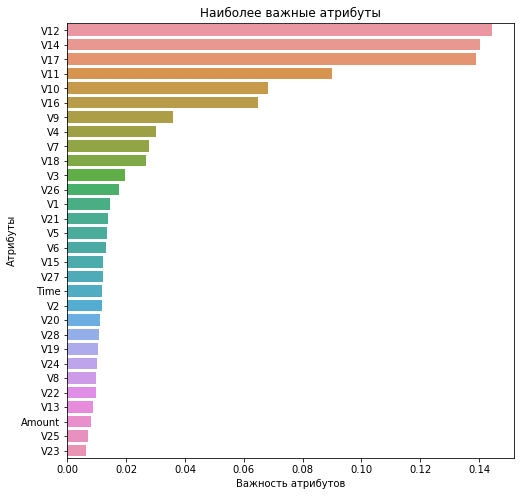

In [30]:
# наиболее важные атрибуты для модели
headers = list(dataset.iloc[:, :-1].columns.values)

feature_imp = pd.Series(classifier.feature_importances_, index=headers).sort_values(ascending=False) 

f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# plt.legend()
plt.show()

In [24]:
# формируем прогноз
y_pred = classifier.predict(X_test)

In [25]:
# результаты
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[85293     9]
 [   34   107]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.92      0.76      0.83       141

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9994967405170698


In [27]:
# общая точность модели, фактически, равна 1
# по классу 1 (обманные сделки) показатели точности и чувствительности ниже, чем для класса 0, что, вероятно, связано с 
# гораздо меньшим количеством таких элементов в тестовой выборке

8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?

In [31]:
d = dataset.iloc[:, :-1]
d.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [32]:
headers = list(d.columns.values)

In [33]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(d)
d_norm = pd.DataFrame(np_scaled)
d_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [34]:
d_norm.columns = headers
d_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [35]:
X = d_norm.values
y = dataset.iloc[:, 30].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [37]:
# обучаем модель с помощью класса sklearn класса RandomForestClassifie
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
# формируем прогноз
y_pred = classifier.predict(X_test)

In [39]:
# результаты
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[85286    11]
 [   28   118]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.91      0.81      0.86       146

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995435553526912


In [ ]:
# общая точность модели после нормализации данных, фактически, не изменилась
# по классу 1 (обманные сделки) показатель чувствительности увеличился 
# сравнение Classification Report для двух моделей показывает, что нормализация данных в данном случае не нужна

9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).

In [40]:
y = dataset.iloc[:, 30].values

In [41]:
# Создадим тренировочный и тестовый датасет из исходных данных
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(d_norm,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [42]:
# Увеличим количество тренировочных данных (тестовые данные остаются нетронутыми)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398048


In [45]:
# результаты уравновешивания классов
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199024, 1: 199024}

In [1]:
# # Построим pie-график
# labels = 'Class', 'Class'
# sizes = [199024, 199024]
# explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# fig1, ax1 = plt.subplots(figsize=(6, 6))
# plt.title('Распределение классов в процентном соотношении в тренировочной выборке')
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()